
<br>
<font>
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=150 height=150> <br>
<font color=0F5298 size=7>
Artificial Intelligence <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 - polynomial regression <br>
<font color=696880 size=4>
Ali Rahimi Akbar

____

#Personal Data

In [1]:
# Set your student number and name
student_number = "401106339"
Name = "Ali"
Last_Name = "Ghasemzadeh"

## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.


## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-3 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5.

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^6 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [3]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    mu = 0
    X = np.linspace(range_start, range_end, num_samples)
    Y = 0.1*(X**6) - 2*(X**3) + 7*(X**2) - 9*X + 3
    noise = np.random.normal(mu, noise_std, X.shape)
    Y = Y + noise
    return X, Y

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 4 to 6.**

In [4]:
from sklearn.model_selection import train_test_split

range_start, range_end = -3, -1
num_samples = 1000
X, Y = generate_dataset(range_start, range_end, num_samples)
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.5)

# sort the sample base on the X for better performance
for i in range(len(x_train)):
    for j in range(i):
        if x_train[i] > x_train[j]:
            t = x_train[i]
            x_train[i] = x_train[j]
            x_train[j] = t
            t = y_train[i]
            y_train[i] = y_train[j]
            y_train[j] = t

range_start, range_end = 4, 6
num_samples = x_test1.shape[0]
x_test2 , y_test2 = generate_dataset(range_start, range_end, num_samples)

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 12. You can't use sklearn library for this section

In [5]:
from scipy.special import comb
class PolynomailRegression() :

    def __init__( self, degree, learning_rate = 0.05, iterations = 500) :
        # initialize  model
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None

    def fit(self, X, Y):
        # normalize the input
        x_max = np.max(X)
        x_min = np.min(X)
        X = (X - x_max)/(-x_max + x_min)

        x_poly = self.create_poly(X)

        # initialize weights to zero
        self.weights = np.zeros(x_poly.shape[1])

        # Gradient descent
        for i in range(self.iterations):
            predictions = x_poly.dot(self.weights)
            errors = predictions - Y
            gradient = x_poly.T.dot(errors) / len(Y)
            self.weights -= self.learning_rate * gradient

        # we normalize the weights and now we sholud change weights because we calculate weights of ((x-x_max)/(x_min-x_max))
        # we can gain the formula by writing it here is the code 
        a = x_max
        b = -x_max + x_min
        for i in range(self.degree + 1):
            self.weights[i] /= b**i
            for j in range(i + 1, self.degree + 1):
                k = j-i
                self.weights[i] += (((-1)**k)* self.weights[j] *(a**k)*(comb(j, k))) / b**j

        return self

    def predict(self, X) :
        x_poly = self.create_poly(X)
        return x_poly.dot(self.weights)
    
    def create_poly(self, X):
        x_poly = np.ones((X.shape[0], self.degree + 1))
        for i in range(1, self.degree + 1):
            x_poly[:, i] = X**i
        return x_poly
    
    
models = [PolynomailRegression(i) for i in range(1, 13)]
for i in range(0, 12):
    models[i].fit(x_train, y_train)

## 4. Model Evaluation (15 Points)
Evaluate the models on both train and test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.

In [6]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    errors = []
    for model in models:
        y_predicted = model.predict(X_test)
        error = mean_squared_error(y_test, y_predicted, squared= True)
        errors.append(error)
    errors = np.array(errors)
    return errors

print(evaluate_models(models, x_train, y_train))

[302.21510715  84.01981939  33.37952544  25.5562666   29.73769758
  35.28360264  39.15989771  41.0555403   41.44125562  40.87426594
  39.79708874  38.51237754]


## 5. Plotting your predicted polynomial function

plot your predicted function at degree 5 and 6 and 7 and the base function from question in range -3 to -1.

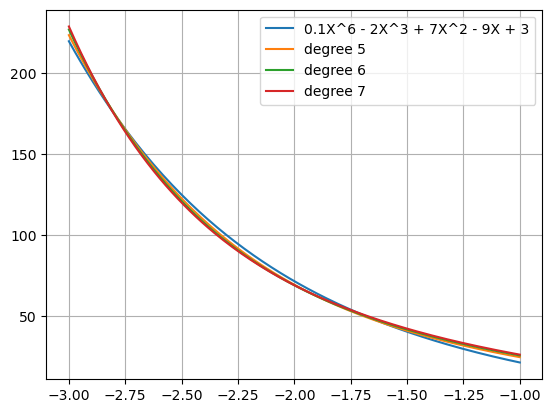

In [7]:
import matplotlib.pyplot as plt
num_samples = 150
start_range, end_range = -3, -1
# get some x sorted from start to end
x_t = np.sort(np.linspace(start_range, end_range, num_samples))

# plot the real y
y_t = []
coefficients = [3, -9, 7, -2, 0, 0, 0.1]
for i in range(len(x_t)):
    y_t.append(coefficients[0])
    for j in range(1, len(coefficients)):
        y_t[i] += coefficients[j] * (x_t[i]**j)
plt.plot(x_t, y_t, label="0.1X^6 - 2X^3 + 7X^2 - 9X + 3")

# plot the predicted y
for i in range(4, 7):
    plt.plot(x_t, models[i].predict(x_t), label="degree " + str(i+1))

plt.legend()
plt.grid(True)
plt.show()

## 6. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and test sets based on the model degree varying from 2 to 12.

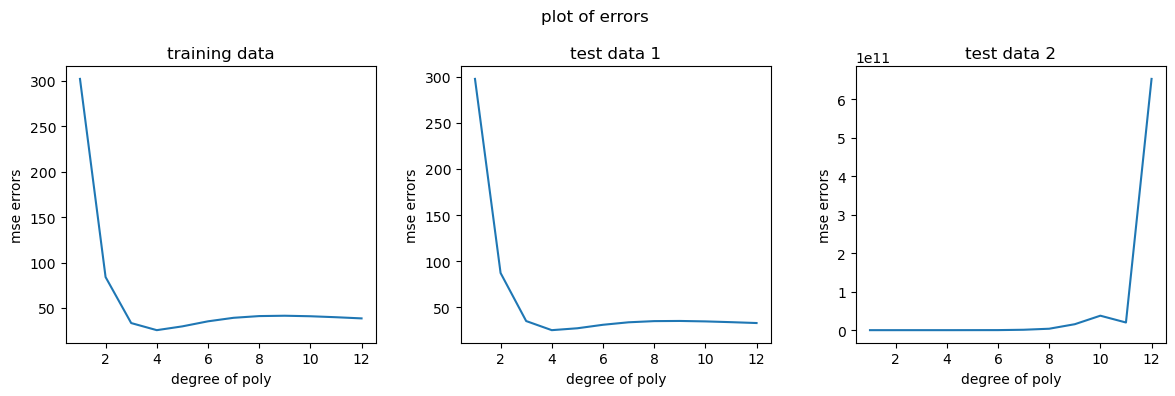

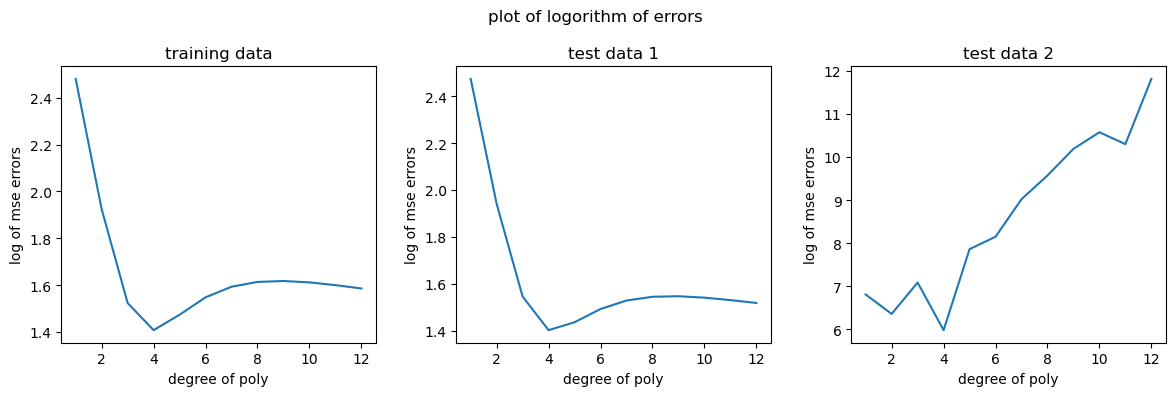

In [8]:
import math
from plotly.subplots import make_subplots
mse_train = evaluate_models(models, x_train, y_train)
mse_test1 = evaluate_models(models, x_test1, y_test1)
mse_test2 = evaluate_models(models, x_test2, y_test2)
mse_tr = [math.log10(i) for i in mse_train]
mse_t1 = [math.log10(i) for i in mse_test1]
mse_t2 = [math.log10(i) for i in mse_test2] 

x = [i for i in range(1, 13)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("plot of errors")
ax1.plot(x, mse_train, label="plt1")
ax1.set_title("training data")
ax1.set_xlabel("degree of poly")
ax1.set_ylabel("mse errors")

ax2.plot(x, mse_test1, label="plt2")
ax2.set_title("test data 1")
ax2.set_xlabel("degree of poly")
ax2.set_ylabel("mse errors")

ax3.plot(x, mse_test2, label="plt3")
ax3.set_title("test data 2")
ax3.set_xlabel("degree of poly")
ax3.set_ylabel("mse errors")

plt.tight_layout()
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle("plot of logorithm of errors")
ax1.plot(x, mse_tr, label="plt1")
ax1.set_title("training data")
ax1.set_xlabel("degree of poly")
ax1.set_ylabel("log of mse errors")

ax2.plot(x, mse_t1, label="plt2")
ax2.set_title("test data 1")
ax2.set_xlabel("degree of poly")
ax2.set_ylabel("log of mse errors")

ax3.plot(x, mse_t2, label="plt3")
ax3.set_title("test data 2")
ax3.set_xlabel("degree of poly")
ax3.set_ylabel("log of mse errors")

plt.tight_layout()
plt.show()

## Conclusion (10 Points)
With comparing the loss of **training set and the test set** specially in higher degrees, what we can conclude about the bias - variance trade off?

<p dir="rtl">
با افزایش درجه معادله با 
training data 
فیت می شود و باعث می شود که برای خروجی ها بیرون از محدوده خطای زیادی داشته باشیم ولی در درجه های کمتر که نمودار کمتر فیت می شود و
باعث می شود که خروجی مان روی ورودی خارج از محدوده خطای کمتری داشته باشد 
از طرفی اگر درجه مان هم خیلی کوچک باشد 
باعث می شود که باز نتوانیم خوب تخمین بزنیم برای همین باید یک
trade_off
ای بین درجه ی چند جمله ای و میزان خطا داریم که اگه درجه را خیلی زیاد کنیم خطا زیاد می شود و اگر هم درجه را خیلی کم کنیم 
باز هم خطا زیاد می شود برای همین درجه های اون وسط بهتر هستند برای تخمین
</p>

<p dir="rtl">
در واقع وقتی درجه را زیاد می کنیم واریانس زیاد و بایس کم می شود و وقتی که درجه را کم کنیم واریانس کم و بایس زیاد می شود
بالاتر هم گفته شد که اگر درجه کم باشد چه مشکلاتی ایجاد می شود و اگر هم زیاد باشد چه مشکلاتی ایجاد میکند.
در نهایت بین بایس و واریانس باید یک 
trade_off
برقرار کنیم.
</p>